# Bellabeat wellness company Data-Analysis

This case study is based on the Capstone project from Coursera course - **Google Data Analytics Professional Certificate.** <br>
The data is analysed using the 6 phases (Ask, Prepare, Process, Analyse, Share, Act) of Data analytics mentioned in the course.

Title : **Bellabeat wellness company case-study** <br>
Author: **Tanveer Aalam**

<hr style="height:2px;border-width:0;color:black;background-color:black">

# Scenario of the case-study

I would be working as a Junior data analyst, specifically in the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. 

### Stakeholders and team:

**Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer <br>
**Sando Mur:** Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team <br>
**Bellabeat marketing analytics team:** A team of data analysts responsible for collecting, analyzing, and
reporting data that helps guide Bellabeat’s marketing strategy

## Ask

Sršen asks me to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants me to select one Bellabeat product to apply these insights to in your presentation.

The key questions that would be useful for the case study would be:
1. What are some trends in smart device usage?<br>
2. How could these trends apply to Bellabeat customers? <br>
3. How could these trends help influence Bellabeat marketing strategy?

The report should be produced with the following deliverables: <br>
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

## Prepare

**Data Source:** <br>
The data is collected from a public dataset from Kaggle - __[Kaggle: Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)__. <br>
The data is generated by the thirty consented users of 'Fitbit' fitness app for a period of one month, from 12-04-2016 to 12-05-2016<br>
The data includes the fitness activities like: 
* Calories burnt 
* Sleep activity
* Steps
* Heart rate
* Daily physical activities and respective intensities

**Limitations of the data source:**<br>
1. The data is collected in 2016 which means the data might be outdated for the current trends.
2. The duration of the data collected is just one month which means that data is limited to analyse with
3. The size of the data is 30 users, which would create bias because it won't represent the entire female population

**Credibility of the Data:**<br>
To determine the credibilty of the data, data is checked against the traits called ROCCC<br>
1. Reliability - Not realible since the data only contains 30 users
2. Original - The data is collected from thirf-party source, so not original
3. Comprehensive - The data might be comprehensive since the data has the parameters as required by the company
4. Cited - Unknown since the data is collected from third-party
5. Current - The data is collected in 2016, which means 6 year old data. So, the data is not current.

## Process

The datasets used for the analysis would be:
1. dailyActivity_merged.csv
2. hourlyCalories_merged.csv
3. hourlyIntensities_merged.csv
4. hourlySteps_merged.csv
5. sleepDay_merged.csv

The data would be analysed by using the following technologies:
1. Microsoft Excel
2. R programming language

Initially, the data is cleaned using Microsoft Excel since the dataset is smaller. In the dataset 'dailyActivity_merged.csv', the column 'ActivityDate' had improper Date format which is cleaned using MS Excel<br>
The partially cleaned data is stored as: __[Partially cleaned data via MS Excel](https://github.com/Tanveer-Aalam/Projects/blob/main/Bellabeat%20Data%20Analysis/Data%20cleansing/Data_cleansing_via_EXCEL.pdf)__

After the data is saved, the datasets are loaded using R programming language to process further

In R programming language, to work with datasets, to clean data, to visualize data and to perform other necessary actions, we need to install packages into the console

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(lubridate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



After installing the packages like tidyverse, ggplot2, lubridate etc useful for cleaning, visualizing the data and working around with dates, we now load the CSV files as dataframes.<br>
'dailyActivity_merged.csv' is now being loaded as a dataframe - total_activity

In [4]:
total_activity <- read.csv("dailyActivity_merged.csv")
head(total_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,12-04-2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,13-04-2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,14-04-2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,15-04-2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,16-04-2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,17-04-2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


We describe the dataframe using str() function in R language

In [5]:
str(total_activity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Factor w/ 31 levels "01-05-2016","02-05-2016",..: 12 14 15 16 17 18 19 20 21 22 ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 6.48 8.59 9.88 6.68 6.34 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 6.48 8.59 9.88 6.68 6.34 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 3.19 3.25 3.53 1.96 1.34 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 0.78 0.64 1.32 0.48 0.35 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 2.51 4.71 5.03 4.24 4.65 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 

We now convert the date from 'dd-mm-yyyy' format to 'yyyy-mm-dd' format using function from lubridate package

In [6]:
Activity_Date <- dmy(total_activity$ActivityDate)
head(Activity_Date)

[1] "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16"
[6] "2016-04-17"

In [7]:
Total_mins <- total_activity$VeryActiveMinutes + total_activity$FairlyActiveMinutes + total_activity$LightlyActiveMinutes + total_activity$SedentaryMinutes
head(Total_mins)

[1] 1094 1033 1440  998 1040  761

In [8]:
Total_hours <- ceiling(Total_mins/60)
head(Total_hours)

[1] 19 18 24 17 18 13

Now we add total_minutes, total_hours, activity_date column into the dataframe using 'mutate' function

In [9]:
tot_activity <- mutate(total_activity, Activity_Date, Day_Week = weekdays(Activity_Date))

In [10]:
tot_activity <- mutate(tot_activity, Total_mins, Total_hours)
head(tot_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_Date,Day_Week,Total_mins,Total_hours
1503960366,12-04-2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,Tuesday,1094,19
1503960366,13-04-2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,Wednesday,1033,18
1503960366,14-04-2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14,Thursday,1440,24
1503960366,15-04-2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,Friday,998,17
1503960366,16-04-2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,Saturday,1040,18
1503960366,17-04-2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,Sunday,761,13


Now we check if any rows have missing values or any duplicated data is present in the dataframe.

In [11]:
sum(is.na(tot_activity))
sum(duplicated(tot_activity))

[1] 0

[1] 0

We have checked for the possible data inconsistency issues from the dataset. The data doesn't have any missing values or duplicated rows and the data is in proper format <br>
Now we repeat similar process to the rest of the datasets

In [12]:
sleepDay <- read.csv("sleepDay_merged.csv")
head(sleepDay)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [13]:
sleep_Date <- mutate(sleepDay, Activity_Date = mdy_hms(sleepDay$SleepDay), Day_week = weekdays(Activity_Date))
head(sleep_Date)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Activity_Date,Day_week
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,Tuesday
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,Wednesday
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,Friday
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,Saturday
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,Sunday
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,Tuesday


In [14]:
sum(is.na(sleep_Date))
sum(duplicated((sleep_Date)))

[1] 0

[1] 3

In [15]:
sleep_Day <- unique(sleep_Date)
sum(duplicated(sleep_Day))

[1] 0

In [16]:
sleepDay <- subset(sleep_Day, select = -Activity_Date)
head(sleepDay)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_week
1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday
1503960366,4/13/2016 12:00:00 AM,2,384,407,Wednesday
1503960366,4/15/2016 12:00:00 AM,1,412,442,Friday
1503960366,4/16/2016 12:00:00 AM,2,340,367,Saturday
1503960366,4/17/2016 12:00:00 AM,1,700,712,Sunday
1503960366,4/19/2016 12:00:00 AM,1,304,320,Tuesday


In [17]:
Activity_Date <- as.Date(sleep_Day$Activity_Date)
sleepDay <- mutate(sleepDay, Activity_Date)
head(sleepDay)
str(sleepDay)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_week,Activity_Date
1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,2016-04-12
1503960366,4/13/2016 12:00:00 AM,2,384,407,Wednesday,2016-04-13
1503960366,4/15/2016 12:00:00 AM,1,412,442,Friday,2016-04-15
1503960366,4/16/2016 12:00:00 AM,2,340,367,Saturday,2016-04-16
1503960366,4/17/2016 12:00:00 AM,1,700,712,Sunday,2016-04-17
1503960366,4/19/2016 12:00:00 AM,1,304,320,Tuesday,2016-04-19


'data.frame':	410 obs. of  7 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : Factor w/ 31 levels "4/12/2016 12:00:00 AM",..: 1 2 4 5 6 8 9 10 12 13 ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...
 $ Day_week          : chr  "Tuesday" "Wednesday" "Friday" "Saturday" ...
 $ Activity_Date     : Date, format: "2016-04-12" "2016-04-13" ...


In [18]:
hourly_calories <- read.csv("hourlyCalories_merged.csv")
head(hourly_calories)

Id,ActivityHour,Calories
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


In [19]:
sum(is.na(hourly_calories))
sum(duplicated(hourly_calories))

[1] 0

[1] 0

In [20]:
hour_Cal1 <- mutate(hourly_calories, DateTime = hourly_calories$ActivityHour)
head(hour_Cal1)

Id,ActivityHour,Calories,DateTime
1503960366,4/12/2016 12:00:00 AM,81,4/12/2016 12:00:00 AM
1503960366,4/12/2016 1:00:00 AM,61,4/12/2016 1:00:00 AM
1503960366,4/12/2016 2:00:00 AM,59,4/12/2016 2:00:00 AM
1503960366,4/12/2016 3:00:00 AM,47,4/12/2016 3:00:00 AM
1503960366,4/12/2016 4:00:00 AM,48,4/12/2016 4:00:00 AM
1503960366,4/12/2016 5:00:00 AM,48,4/12/2016 5:00:00 AM


In [21]:
Hour_day_Cal <- format(as.POSIXct(hour_Cal1$DateTime,format='%m/%d/%Y %I:%M:%S %p'),format="%H")
hour_Cal <- mutate(hour_Cal1, Hour_day_Cal)
head(hour_Cal)

Id,ActivityHour,Calories,DateTime,Hour_day_Cal
1503960366,4/12/2016 12:00:00 AM,81,4/12/2016 12:00:00 AM,00
1503960366,4/12/2016 1:00:00 AM,61,4/12/2016 1:00:00 AM,01
1503960366,4/12/2016 2:00:00 AM,59,4/12/2016 2:00:00 AM,02
1503960366,4/12/2016 3:00:00 AM,47,4/12/2016 3:00:00 AM,03
1503960366,4/12/2016 4:00:00 AM,48,4/12/2016 4:00:00 AM,04
1503960366,4/12/2016 5:00:00 AM,48,4/12/2016 5:00:00 AM,05


In [22]:
hourly_intensity <- read.csv("hourlyIntensities_merged.csv")
head(hourly_intensity)

sum(is.na(hourly_intensity))
sum(duplicated(hourly_intensity))

Id,ActivityHour,TotalIntensity,AverageIntensity
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


[1] 0

[1] 0

In [23]:
hour_Int1 <- mutate(hourly_intensity, DateTime = hourly_intensity$ActivityHour)
head(hour_Int1)

Hour_day_Int <- format(as.POSIXct(hour_Int1$DateTime,format='%m/%d/%Y %I:%M:%S %p'),format="%H")

hour_Int <- mutate(hour_Int1, Hour_day_Int)
head(hour_Int)

Id,ActivityHour,TotalIntensity,AverageIntensity,DateTime
1503960366,4/12/2016 12:00:00 AM,20,0.333333,4/12/2016 12:00:00 AM
1503960366,4/12/2016 1:00:00 AM,8,0.133333,4/12/2016 1:00:00 AM
1503960366,4/12/2016 2:00:00 AM,7,0.116667,4/12/2016 2:00:00 AM
1503960366,4/12/2016 3:00:00 AM,0,0.000000,4/12/2016 3:00:00 AM
1503960366,4/12/2016 4:00:00 AM,0,0.000000,4/12/2016 4:00:00 AM
1503960366,4/12/2016 5:00:00 AM,0,0.000000,4/12/2016 5:00:00 AM


Id,ActivityHour,TotalIntensity,AverageIntensity,DateTime,Hour_day_Int
1503960366,4/12/2016 12:00:00 AM,20,0.333333,4/12/2016 12:00:00 AM,00
1503960366,4/12/2016 1:00:00 AM,8,0.133333,4/12/2016 1:00:00 AM,01
1503960366,4/12/2016 2:00:00 AM,7,0.116667,4/12/2016 2:00:00 AM,02
1503960366,4/12/2016 3:00:00 AM,0,0.000000,4/12/2016 3:00:00 AM,03
1503960366,4/12/2016 4:00:00 AM,0,0.000000,4/12/2016 4:00:00 AM,04
1503960366,4/12/2016 5:00:00 AM,0,0.000000,4/12/2016 5:00:00 AM,05


In [24]:
hourly_steps <- read.csv("hourlySteps_merged.csv")
head(hourly_steps)

sum(is.na(hourly_steps))
sum(duplicated(hourly_steps))

Id,ActivityHour,StepTotal
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


[1] 0

[1] 0

In [25]:
hour_Steps1 <- mutate(hourly_steps, DateTime = hourly_steps$ActivityHour)
head(hour_Steps1)

Hour_day_Steps <- format(as.POSIXct(hour_Steps1$DateTime,format='%m/%d/%Y %I:%M:%S %p'),format="%H")

hour_Steps <- mutate(hour_Steps1, Hour_day_Steps)
head(hour_Steps)

Id,ActivityHour,StepTotal,DateTime
1503960366,4/12/2016 12:00:00 AM,373,4/12/2016 12:00:00 AM
1503960366,4/12/2016 1:00:00 AM,160,4/12/2016 1:00:00 AM
1503960366,4/12/2016 2:00:00 AM,151,4/12/2016 2:00:00 AM
1503960366,4/12/2016 3:00:00 AM,0,4/12/2016 3:00:00 AM
1503960366,4/12/2016 4:00:00 AM,0,4/12/2016 4:00:00 AM
1503960366,4/12/2016 5:00:00 AM,0,4/12/2016 5:00:00 AM


Id,ActivityHour,StepTotal,DateTime,Hour_day_Steps
1503960366,4/12/2016 12:00:00 AM,373,4/12/2016 12:00:00 AM,00
1503960366,4/12/2016 1:00:00 AM,160,4/12/2016 1:00:00 AM,01
1503960366,4/12/2016 2:00:00 AM,151,4/12/2016 2:00:00 AM,02
1503960366,4/12/2016 3:00:00 AM,0,4/12/2016 3:00:00 AM,03
1503960366,4/12/2016 4:00:00 AM,0,4/12/2016 4:00:00 AM,04
1503960366,4/12/2016 5:00:00 AM,0,4/12/2016 5:00:00 AM,05


Now we need to join the 'sleep_Day' and 'tot_activity' dataframe to find the patterns among calories, sleep activity, distance covered etc 

In [26]:
sleep_total_activities <- inner_join(sleepDay, tot_activity, by = c("Id", "Activity_Date"))
sleep_total_activity <- mutate(sleep_total_activities, Latency = sleep_total_activities$TotalTimeInBed - sleep_total_activities$TotalMinutesAsleep)
head(sleep_total_activity)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_week,Activity_Date,ActivityDate,TotalSteps,TotalDistance,...,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_Week,Total_mins,Total_hours,Latency
1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,2016-04-12,12-04-2016,13162,8.50,...,0,25,13,328,728,1985,Tuesday,1094,19,19
1503960366,4/13/2016 12:00:00 AM,2,384,407,Wednesday,2016-04-13,13-04-2016,10735,6.97,...,0,21,19,217,776,1797,Wednesday,1033,18,23
1503960366,4/15/2016 12:00:00 AM,1,412,442,Friday,2016-04-15,15-04-2016,9762,6.28,...,0,29,34,209,726,1745,Friday,998,17,30
1503960366,4/16/2016 12:00:00 AM,2,340,367,Saturday,2016-04-16,16-04-2016,12669,8.16,...,0,36,10,221,773,1863,Saturday,1040,18,27
1503960366,4/17/2016 12:00:00 AM,1,700,712,Sunday,2016-04-17,17-04-2016,9705,6.48,...,0,38,20,164,539,1728,Sunday,761,13,12
1503960366,4/19/2016 12:00:00 AM,1,304,320,Tuesday,2016-04-19,19-04-2016,15506,9.88,...,0,50,31,264,775,2035,Tuesday,1120,19,16


## Analyse

We have worked on finding out the uncleaned, inconsistent, missing and duplicate data and cleaned the data accordingly. We have manipulated the data by adding columns required for further analysis. <br>
After completion of process phase, which is data cleaning, we analyse the data by finding aggregate values for respective columns

In [33]:
Avg_steps <- mean(tot_activity$TotalSteps)
Avg_steps

[1] 7637.911

In [34]:
Avg_Distance <- mean(tot_activity$TotalDistance)
Avg_Distance

[1] 5.489702

In [35]:
Avg_cal <- mean(tot_activity$Calories)
Avg_cal

[1] 2303.61

In [31]:
mins_asleep <-mean(sleep_total_activity$TotalMinutesAsleep)
mins_asleep/60

[1] 6.98622

In [42]:
Avg_latency <- mean(sleep_total_activity$Latency)
Avg_latency

[1] 39.30976

In [37]:
Avg_very_active <- mean(tot_activity$VeryActiveMinutes)
Avg_very_active

[1] 21.16489

In [38]:
Avg_fair_active <- mean(tot_activity$FairlyActiveMinutes)
Avg_fair_active

[1] 13.56489

In [39]:
Avg_light_active <- mean(tot_activity$LightlyActiveMinutes)
Avg_light_active

[1] 192.8128

In [40]:
Avg_sedentary <- mean(tot_activity$SedentaryMinutes)
Avg_sedentary

[1] 991.2106

In [41]:
Avg_total <- mean(tot_activity$Total_mins)
Avg_total

[1] 1218.753

From the analysis on the data we have, we are able to draw the following insights:
* The average steps taken by a woman is about 7637 and that sums around 5.5kms per day, while the average steps to be taken would be around 10,000 steps or cover a distance of about 7-8kms per day
* The average latency time from the data is around 40 mins, while a healthy indivisual has a sleep latency of 10-20 mins
* The users seems to be spending around 991 mins of their time in sedenteriness out of 1218 mean minutes, which is around 81%

## Share

While we were able to analyse the data through the usage of functions and methods, it is important to visualise the data inorder for the stakeholders to understand the insights <br>
We used ggplot package from tidyverse package to visualise the data into different plots and graphs

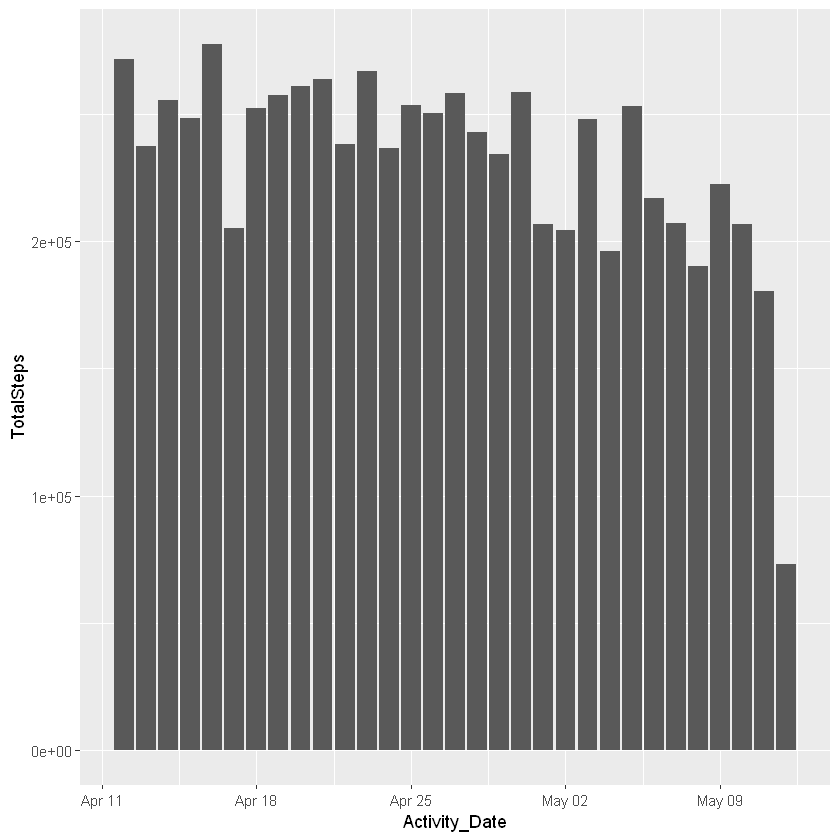

In [55]:
Date_steps <- ggplot(tot_activity, aes(x=Activity_Date, y=TotalSteps)) + geom_bar(stat = "identity")
Date_steps

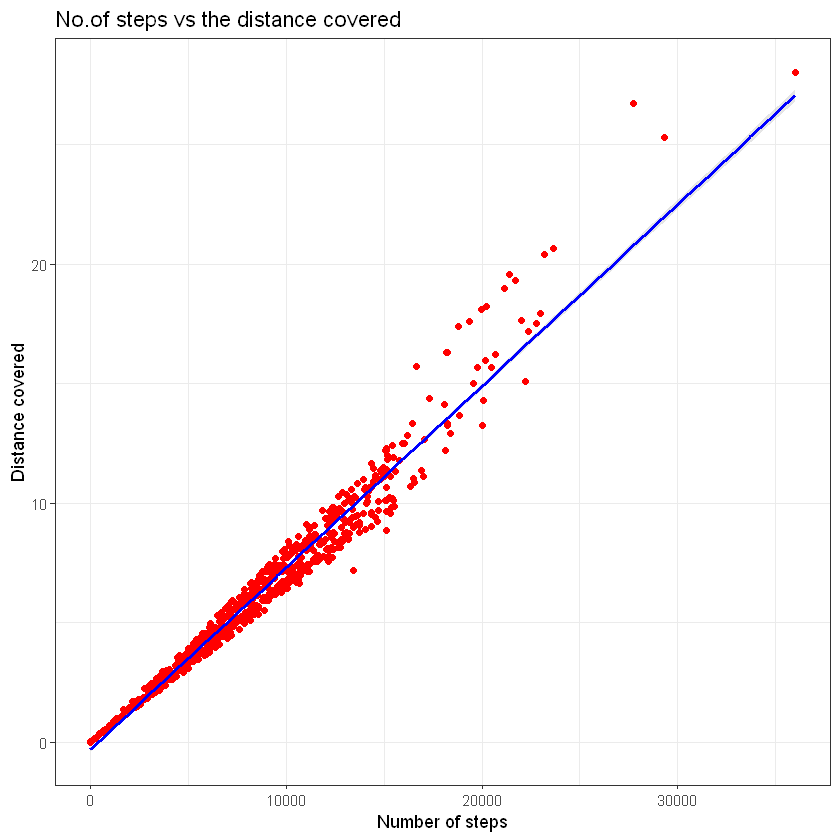

In [56]:
Steps_Distance <- ggplot(tot_activity, aes(x=TotalSteps, y=TotalDistance, group=1)) + geom_point(color = "red") + geom_smooth(method = "lm", color = "blue", fill = "gray") + theme_bw() + labs(title = "No.of steps vs the distance covered", x = "Number of steps", y = "Distance covered")
Steps_Distance

It was obvious that the number of steps was directly proportional to distance covered <br>
This scatter plot shows the same

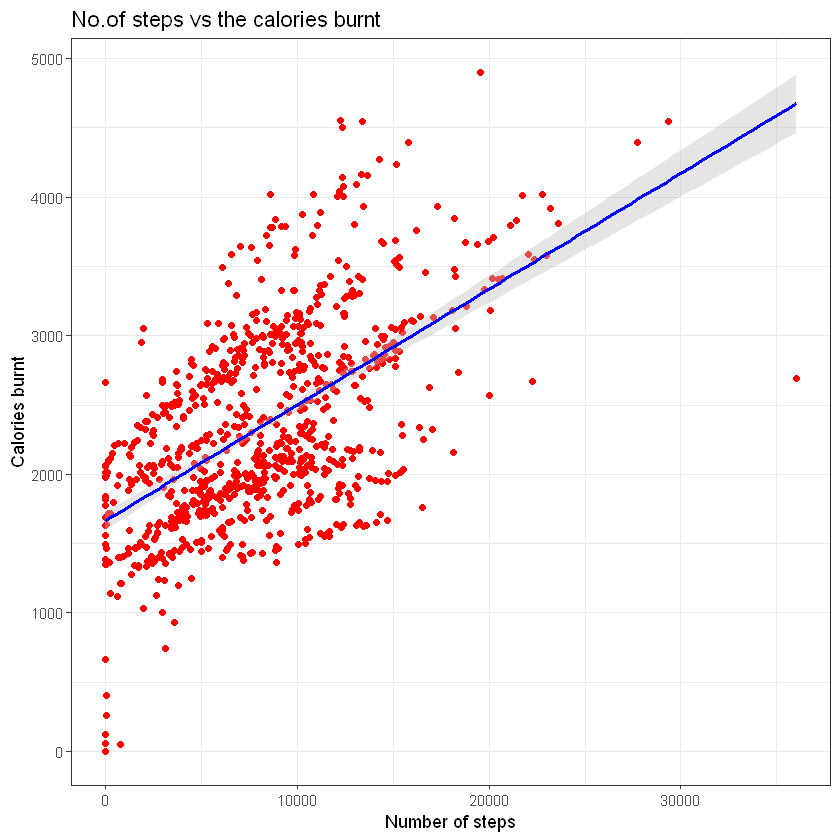

In [57]:
Steps_Calories <- ggplot(tot_activity, aes(x=TotalSteps, y=Calories, group=1)) + geom_point(color = "red") + geom_smooth(method = "lm", color = "blue", fill = "gray") + theme_bw() + labs(title = "No.of steps vs the calories burnt", x = "Number of steps", y = "Calories burnt")
Steps_Calories

This scatter plot shows that the calories burnt is directly proportional to the number of steps taken/distance covered

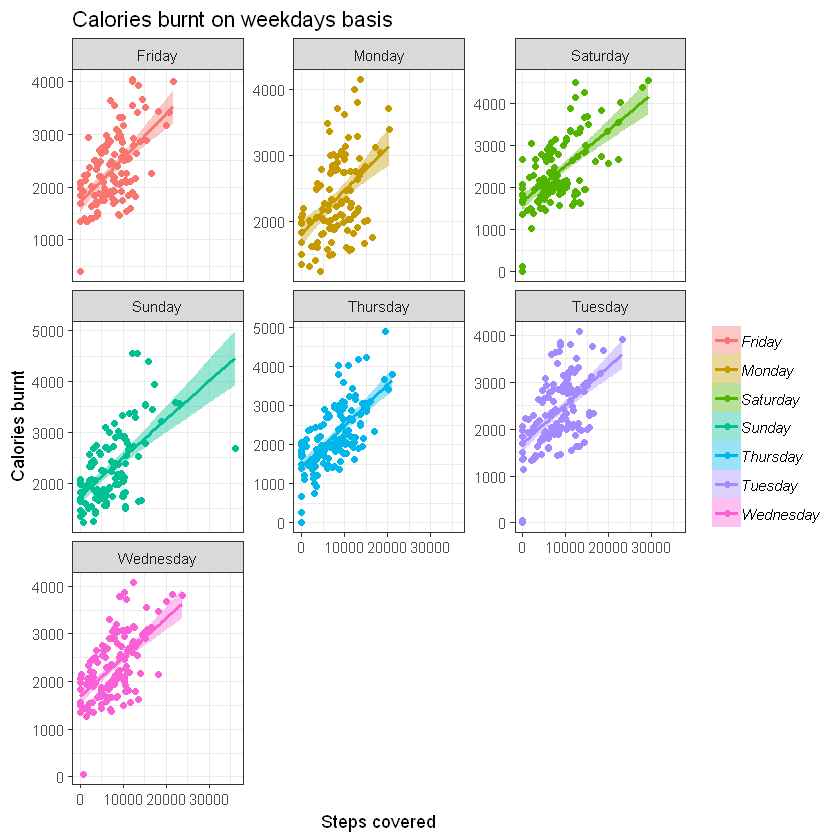

In [58]:
Days_Calories = ggplot(tot_activity, aes(x=TotalSteps, y=Calories, color=Day_Week)) + geom_point() + geom_smooth(method="lm", aes(fill=Day_Week)) + theme_bw() + labs(title = "Calories burnt on weekdays basis", x="Steps covered", y="Calories burnt") + facet_wrap(~ Day_Week, scales = "free_y") + theme(legend.text = element_text(face="italic"), legend.title = element_blank())
Days_Calories

The facet scatter plot shows the relation between steps covered Vs calories burnt over a period of week <br>
From the plot, it is evident that the users tend to walk more during the weekends

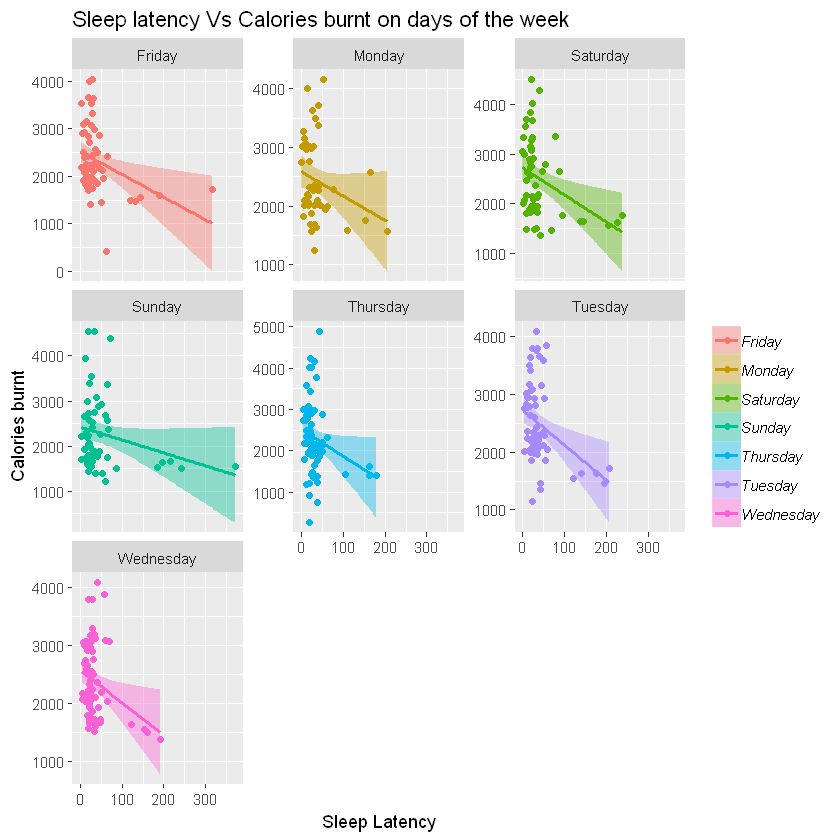

In [59]:
Sleep_Latency <- ggplot(sleep_total_activity, aes(x=Latency, y=Calories, color=Day_Week)) + geom_point() + geom_smooth(method="lm", aes(fill=Day_Week)) + facet_wrap(~ Day_Week, scales = "free_y") + theme(legend.text = element_text(face = "italic"), legend.title = element_blank()) + labs(title = "Sleep latency Vs Calories burnt on days of the week", x="Sleep Latency", y="Calories burnt")
Sleep_Latency

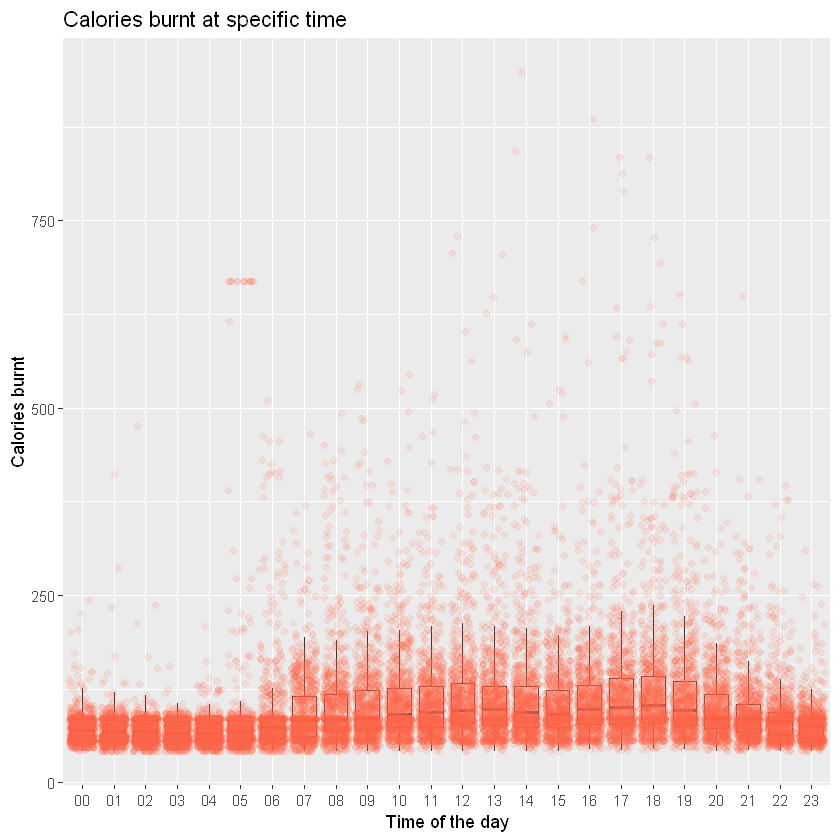

In [60]:
Calory_time <- ggplot(hour_Cal, aes(x=Hour_day_Cal, y=Calories)) + geom_boxplot(alpha = 0) + geom_jitter(alpha = 0.1,color = "tomato") + labs(title = "Calories burnt at specific time", x="Time of the day", y="Calories burnt")
Calory_time

The above boxplot shows the mean values of calories burnt during different times of the day <br>
It is evident that the users burn their calories more during the day time, specifically at the morning and early evening times

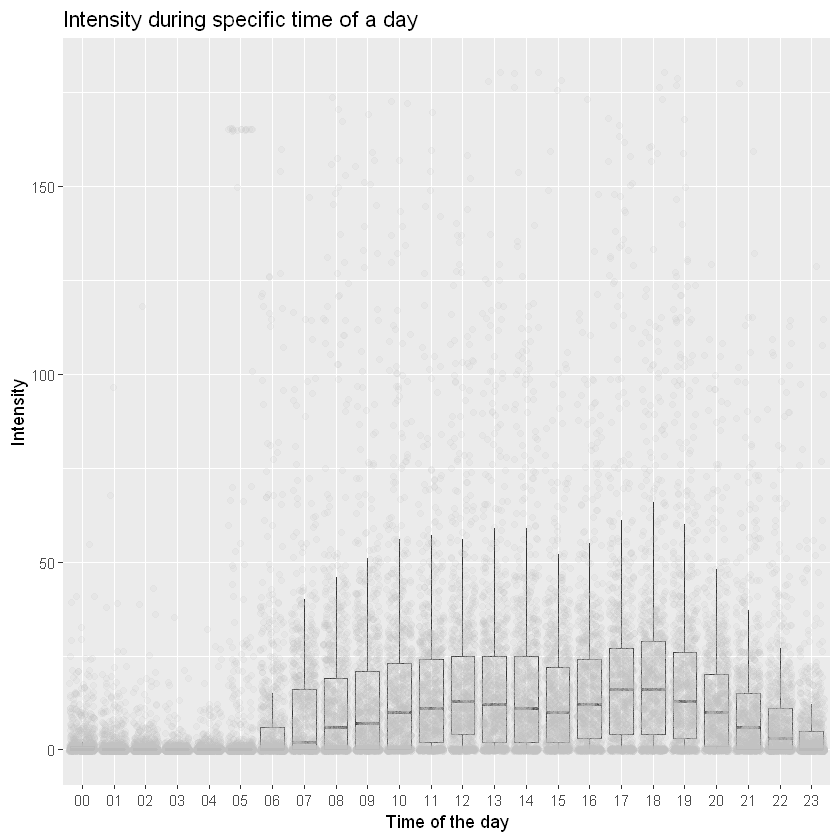

In [61]:
Intensity_time <- ggplot(hour_Int, aes(x=Hour_day_Int, y=TotalIntensity)) + geom_boxplot(alpha = 0) + geom_jitter(alpha = 0.1,color = "gray") + labs(title = "Intensity during specific time of a day", x="Time of the day", y="Intensity")
Intensity_time

Similar to the above boxplot, the users seems to be intense at the activities during day time, specifically at the early evening

In [65]:
sum_very_active <- sum(tot_activity$VeryActiveMinutes)
sum_fair_active <- sum(tot_activity$FairlyActiveMinutes)
sum_light_active <- sum(tot_activity$LightlyActiveMinutes)
sum_sedentary <- sum(tot_activity$SedentaryMinutes)

In [66]:
minutes <- data.frame(type_minute = c("VeryActive", "FairlyActive", "LightlyActive", "Sedentary"), values = c(sum_very_active,sum_fair_active, sum_light_active, sum_sedentary))
head(minutes)

type_minute,values
VeryActive,19895
FairlyActive,12751
LightlyActive,181244
Sedentary,931738


In [86]:
minutes_barplot <- ggplot(minutes, aes(x="", y=values, fill=type_minute)) + geom_bar(width = 1, stat = "identity")
minutes_pie <- minutes_barplot + coord_polar("y", start=0)

In [87]:
blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold")
  )

In [72]:
library(scales)


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



In [76]:
total_mins = sum(sum_very_active + sum_fair_active + sum_light_active + sum_sedentary)
total_mins

[1] 1145628

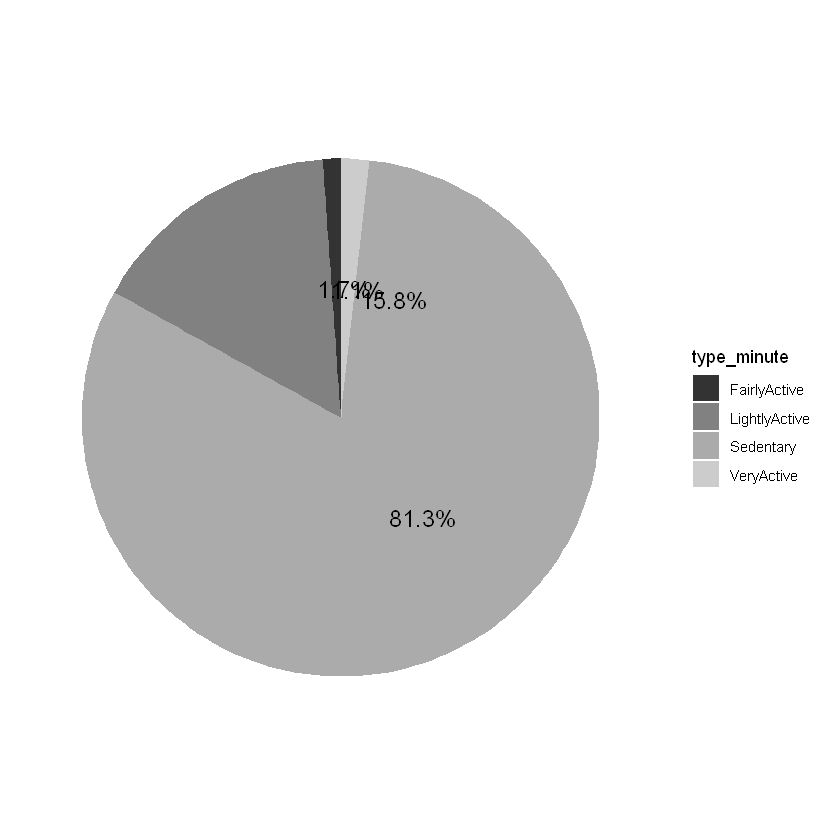

In [89]:
minutes_pie + scale_fill_grey() +  blank_theme +
  theme(axis.text.x=element_blank()) +
  geom_text(aes(y = values/4 + c(0, cumsum(values)[-length(values)]), 
            label = percent(values/total_mins)), size=5)

The pie chart shows that the users majorly spend their time sedentariness and least in fairly active state

In [92]:
library(plyr)
frequency <- count(tot_activity$Day_Week)
frequency

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following object is masked from 'package:lubridate':

    here

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact



x,freq
Friday,126
Monday,120
Saturday,124
Sunday,121
Thursday,147
Tuesday,152
Wednesday,150


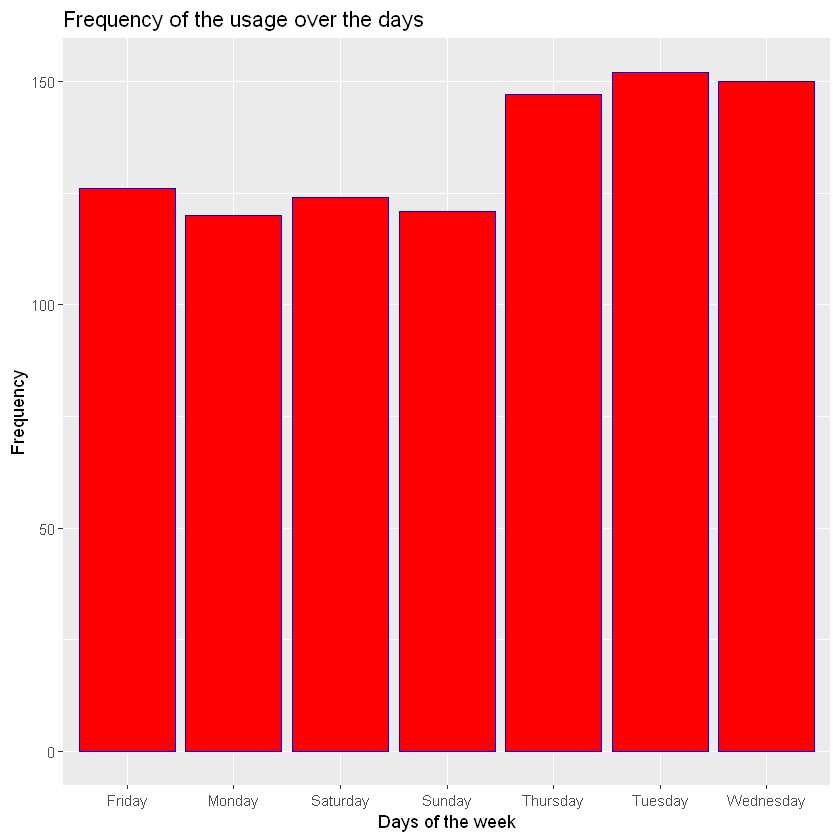

In [93]:
Freq_days <- ggplot(frequency, aes(x=x,y=freq)) + geom_bar(stat="identity", color="blue", fill="red") + labs(title="Frequency of the usage over the days", x="Days of the week", y="Frequency")
Freq_days

## Act

In the final step, we will be delivering our insights and providing recommendations based on our analysis to the stakeholders <br>
Here, we revisit our business questions and share with you our high-level business recommendations.

**1. What are the trends identified?** <br>
* Majority of the users stay in sedenteriness(81.3%) and not been doing activities
* The mean distance covered is lower than the recommended distance to follow a healthy lifestyle
* Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.

**2. How could these trends apply to Bellabeat customers?** <br>
* Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well abe pplied to Bellabeat customers.

**3. How could these trends help influence Bellabeat marketing strategy?** <br>
* Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.
* On weekends, Bellabeat app can also prompt notification to encourage users to exercise.